In [742]:
import os
from pprint import pprint
import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.io.arff import loadarff # type: ignore
import seaborn as sns # type: ignore
%matplotlib inline
import matplotlib.pyplot as plt # type: ignore

In [743]:
data_test = loadarff(os.path.join("ECG5000", "ECG5000_TEST.arff"))
data_train = loadarff(os.path.join("ECG5000", "ECG5000_TRAIN.arff"))

In [744]:
class_names = ['Normal', 'R on T', 'PVC', 'SP', 'UB']
colors = plt.cm.rainbow

In [745]:
dataset = pd.concat([pd.DataFrame(data_test[0]), pd.DataFrame(data_train[0])])
dataset.shape #видим что в датасете 5000 примеров и 141 признак
dataset.keys()

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att132', 'att133', 'att134', 'att135', 'att136', 'att137', 'att138',
       'att139', 'att140', 'target'],
      dtype='object', length=141)

In [746]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [747]:
dataset["target"].value_counts()

target
b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: count, dtype: int64

C:\Users\artio\AppData\Local\Temp\ipykernel_22240\1014747810.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


Text(0.5, 0, 'Классы')

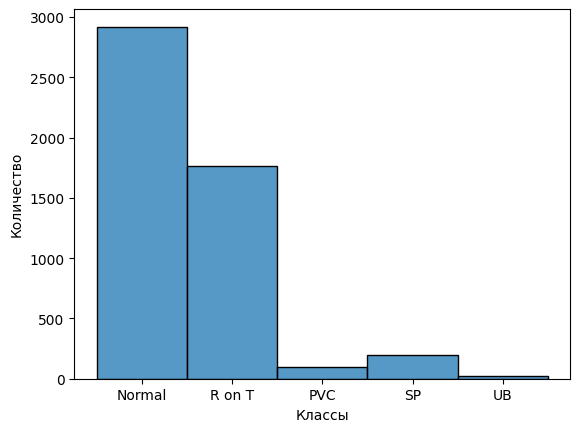

In [748]:
ax = sns.histplot(dataset["target"])
ax.set_xticklabels(class_names)
ax.set_ylabel("Количество")
ax.set_xlabel("Классы")


In [749]:
from numpy import float32
from pandas import DataFrame, Series

df = DataFrame()

df["target"] = dataset["target"]
df["data"] = dataset.iloc[:, 25:110].values.astype(float32).tolist()

In [750]:
def add_noise(signal, noise_level=0.05):
    """
    Добавление шума к сигналу.
    
    Args:
        signal (numpy.array): Исходный сигнал временного ряда.
        noise_level (float): Уровень шума для добавления.
        
    Returns:
        numpy.array: Сигнал с добавленным шумом.
    """
    noise = np.random.normal(scale=noise_level, size=len(signal))
    noisy_signal = signal + noise
    return noisy_signal

In [751]:
# Предполагается, что у вас есть DataFrame с именем df и столбцами 'target' и 'data'

def augment_data_for_class(df, target_class, desired_rows, noise_level=0.05):
    """
    Создает таблицу заданного размера, состоящую из данных определенного класса и зашумленных данных.

    Args:
        df (pandas.DataFrame): DataFrame с двумя столбцами 'target' и 'data'.
        target_class: Значение класса для аугментации.
        desired_rows (int): Желаемое количество строк в результирующей таблице.
        noise_level (float): Уровень шума для добавления к данным.

    Returns:
        pandas.DataFrame: DataFrame, состоящий из данных определенного класса и зашумленных данных.
    """
    # Отфильтровать данные только для указанного класса
    class_data = df[df['target'] == target_class].copy()
    
    # Проверить, что количество строк в class_data достаточно для создания зашумленных данных
    if len(class_data) >= desired_rows:
        # Сгенерировать заданное количество зашумленных данных
        noise_data = [add_noise(class_data.iloc[i]['data'], noise_level) for i in range(desired_rows)]
    else:
        # Если данных недостаточно, создать столько зашумленных данных, сколько есть
        if len(class_data) > 0:
            noise_data = [add_noise(class_data.iloc[i % len(class_data)]['data'], noise_level) for i in range(desired_rows)]
        else:
            raise ValueError("No data available for class {}.".format(target_class))
    
    # Создать DataFrame с зашумленными данными
    noise_df = pd.DataFrame({'target': [target_class] * desired_rows, 'data': noise_data})
    
    # Объединить данные определенного класса с зашумленными данными
    result_df = pd.concat([class_data, noise_df], ignore_index=True)
    
    # Ограничить количество строк в DataFrame до желаемого размера
    result_df = result_df.head(desired_rows)
    
    return result_df

In [780]:
# Пример использования:
# Предполагается, что у вас есть DataFrame с именем df и столбцами 'target' и 'data'

# Задать класс, для которого проводится аугментация
target_class = b'4'

class_counts = df['target'].value_counts()

shift = class_counts.get(target_class, 0)

# Задать желаемое количество строк в результирующей таблице
desired_rows = abs(class_counts.get(b'1', 0) - shift)

# Задать уровень шума для добавления
noise_level = 0.1

# Создать таблицу заданного размера, состоящую из данных определенного класса и зашумленных данных
augmented_df = augment_data_for_class(df, target_class, desired_rows, noise_level)

# Вывести первые несколько строк результирующего DataFrame для проверки
print(augmented_df.shape)
augmented_df.head()

res = pd.concat([df, augmented_df], ignore_index=True).sort_values(by='target')
res.target.value_counts()

(2725, 2)


target
b'1'    2919
b'4'    2919
b'2'    1767
b'3'      96
b'5'      24
Name: count, dtype: int64

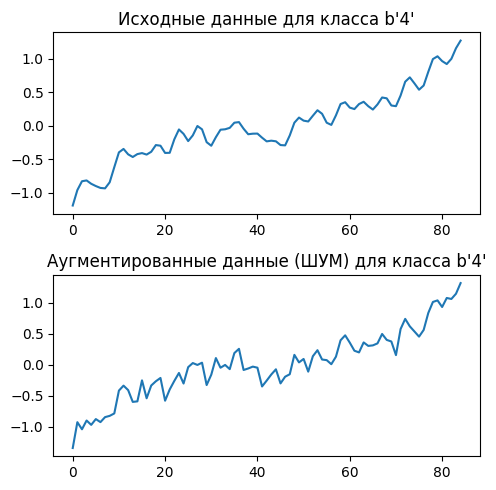

In [781]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 1, 1)  # Первый график
plt.plot(df[df.target == target_class].data.iloc[0])
plt.title('Исходные данные для класса {}'.format(target_class))

plt.subplot(2, 1, 2)  # Второй график
plt.plot(augmented_df.data[shift])
plt.title('Аугментированные данные (ШУМ) для класса {}'.format(target_class))

plt.tight_layout()
plt.show()

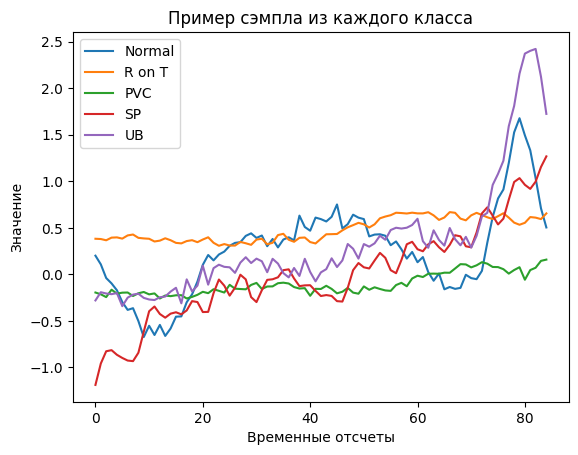

In [754]:
# Выбор уникальных строк по уникальным значениям в столбце 'столбец_1'
unique_rows = df.drop_duplicates(subset=['target'])

# Настройка заголовка и меток осей
plt.title('Пример сэмпла из каждого класcа')
plt.xlabel('Временные отсчеты')
plt.ylabel('Значение')
for index_, class_ in enumerate(unique_rows.data):
    plt.plot(class_, label=f'{class_names[index_]}')
plt.legend()


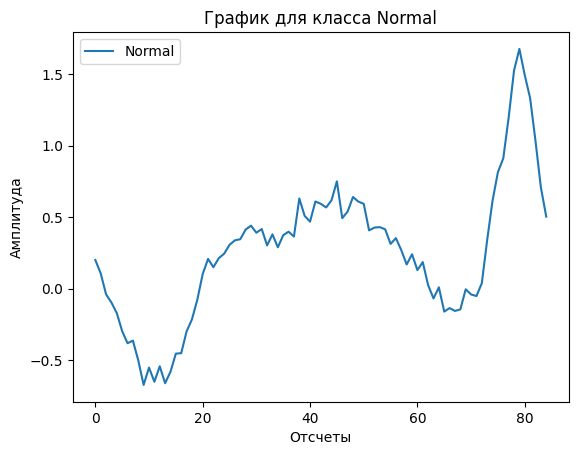

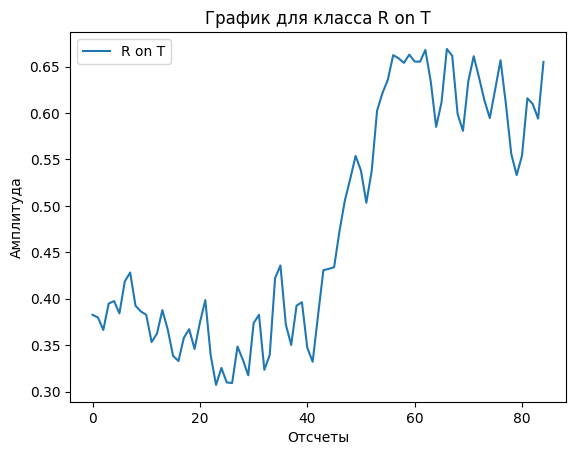

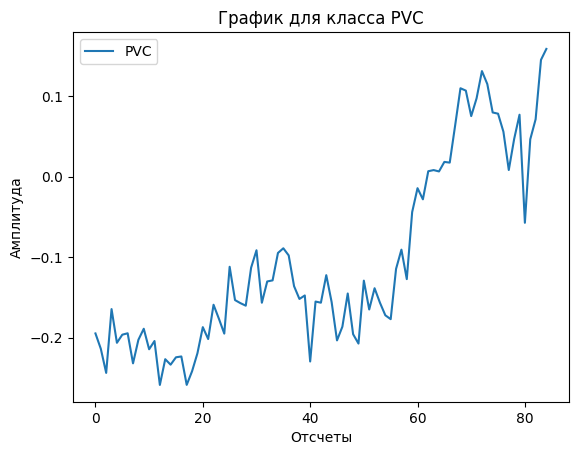

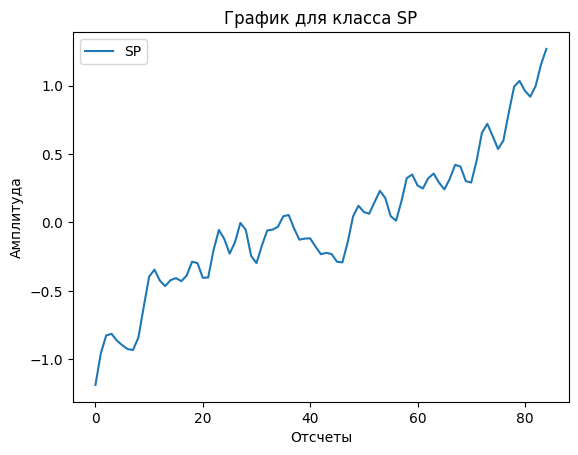

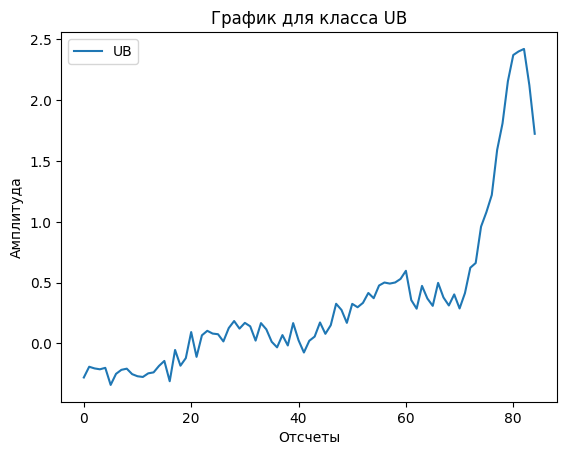

In [755]:
unique_targets = df['target'].unique().tolist()

for target in unique_targets:
    # Фильтрация данных по текущему классу
    class_data = df[df['target'] == target]
    
    # Выбор уникальных строк для текущего класса по уникальным значениям в столбце 'столбец_1'
    unique_rows = class_data.drop_duplicates(subset=['target'])
    # Построение графика для текущего класса
    plt.figure()
    for index_, sample_ in enumerate(unique_rows.data):
        plt.plot(sample_, label=f"{class_names[int(target)-1]}")
    plt.legend()
    plt.title(f'График для класса {class_names[int(target)-1]}')
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда')
    plt.show()


In [756]:
normal = df[df["target"] == b"1"]

normal

,target,data
0,b'1',"[0.20091362297534943, 0.10775283724069595, -0...."
1,b'1',"[-0.56536465883255, -0.6614174842834473, -0.60..."
2,b'1',"[-0.8130083084106445, -0.8555601239204407, -0...."
3,b'1',"[-0.5701583623886108, -0.7772442102432251, -0...."
4,b'1',"[-0.6069830656051636, -0.8067130446434021, -0...."
...,...,...
287,b'1',"[-0.5826429724693298, -0.5698865056037903, -0...."
288,b'1',"[-0.666256844997406, -0.6364011168479919, -0.6..."
289,b'1',"[-0.08407815545797348, -0.1427917331457138, -0..."
290,b'1',"[-0.5492995977401733, -0.5739104747772217, -0...."


Нормализация данных ЭКГ с использованием Z-score Normalization с помощью библиотеки scikit-learn в Python


<b>Z-оценка (Z-score)</b> - это один из методов нормализации данных, который приводит значения признаков к стандартному нормальному распределению со средним значением 0 и стандартным отклонением 1. Этот метод полезен, когда данные имеют разные масштабы или когда распределение данных неизвестно.

In [757]:
from sklearn.preprocessing import StandardScaler, normalize, scale

data = dataset.iloc[:, :-1].values.astype(float32)
pprint(f"Средние значения: {data.mean()}")
pprint(f"Стандартное отклонение: {data.std()}")

scaler = StandardScaler()
normalized_features = scaler.fit_transform(data)
normalized_features

'Средние значения: -1.2207030941624453e-08'
'Стандартное отклонение: 0.9964221715927124'


array([[ 3.4309459 ,  1.6334649 ,  0.27276024, ...,  0.9027221 ,
         1.0812345 , -0.84780145],
       [-0.94220257, -1.6235029 , -1.2512268 , ...,  0.48937124,
         0.85120535, -0.3238306 ],
       [ 1.1167423 ,  0.7328316 ,  0.41497082, ...,  1.3224413 ,
         1.0712261 ,  1.4818207 ],
       ...,
       [ 0.20873186,  0.5099652 ,  0.42477864, ...,  1.1223345 ,
         1.0484949 ,  1.5293782 ],
       [ 0.477748  ,  0.38156304, -0.00579902, ...,  0.3722938 ,
         0.27209717,  0.44153503],
       [-0.75608164, -0.7288417 , -0.4535681 , ...,  0.28584787,
         0.26715025,  0.41247156]], dtype=float32)

l2 нормализация используется если выбросы играют важную роль

In [758]:
normalized_features_l2 = normalize(data, norm="l2")

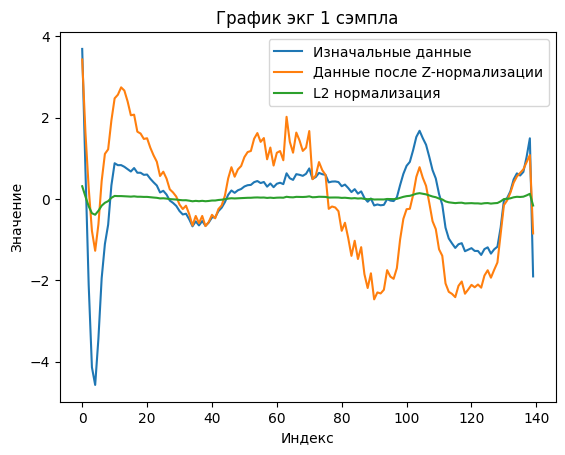

In [759]:
plt.title('График экг 1 сэмпла')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.plot(data[0], label='Изначальные данные')
plt.plot(normalized_features[0], label='Данные после Z-нормализации')
plt.plot(normalized_features_l2[0], label='L2 нормализация')
plt.legend()

In [760]:
means = [np.mean(subarray) for subarray in data]
std_devs = [np.std(subarray) for subarray in data]

for i, (mean, std_dev) in enumerate(zip(means, std_devs)):
    print(f"{i+1}: Среднее = {mean}, Стандартное отклонение = {std_dev}")

1: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
2: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
3: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
4: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
5: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
6: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
7: Среднее = -1.362391888193315e-08, Стандартное отклонение = 0.9964221119880676
8: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
9: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
10: Среднее = 2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
11: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
12: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
13: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
14: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
1